# Transport

# Programming for DA

In [14]:
!pip install missingno

In [4]:
# BASE
import numpy as np
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt
import missingno as msno  

# DATA PREPROCESSING
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor 

# MODELING

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_validate,GridSearchCV 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# MODEL TUNING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

We need to do these things because we don't want to receive warnings.

In [5]:
# WARNINGS
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# IRELAND

## Data Preparation & Visualisation


### Exploratory Data Analysis


Download Dataset 

https://data.gov.ie/dataset/tha25-passenger-journeys-by-public-transport

In [7]:
ireland = pd.read_csv("THA25 - Passenger Journeys by Public Transport.csv")

In [8]:
ireland.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.000
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.000
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,NaN
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.000
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.000


Check information in dataset

In [9]:
ireland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATISTIC          1024 non-null   object 
 1   Statistic Label    1024 non-null   object 
 2   TLIST(W1)          1024 non-null   object 
 3   Week               1024 non-null   object 
 4   C03935V04687       1024 non-null   int64  
 5   Mode of Transport  1024 non-null   object 
 6   UNIT               1024 non-null   object 
 7   VALUE              960 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 64.1+ KB


Check null value

In [10]:
ireland.isnull().sum()

STATISTIC             0
Statistic Label       0
TLIST(W1)             0
Week                  0
C03935V04687          0
Mode of Transport     0
UNIT                  0
VALUE                64
dtype: int64

Data Cleanning

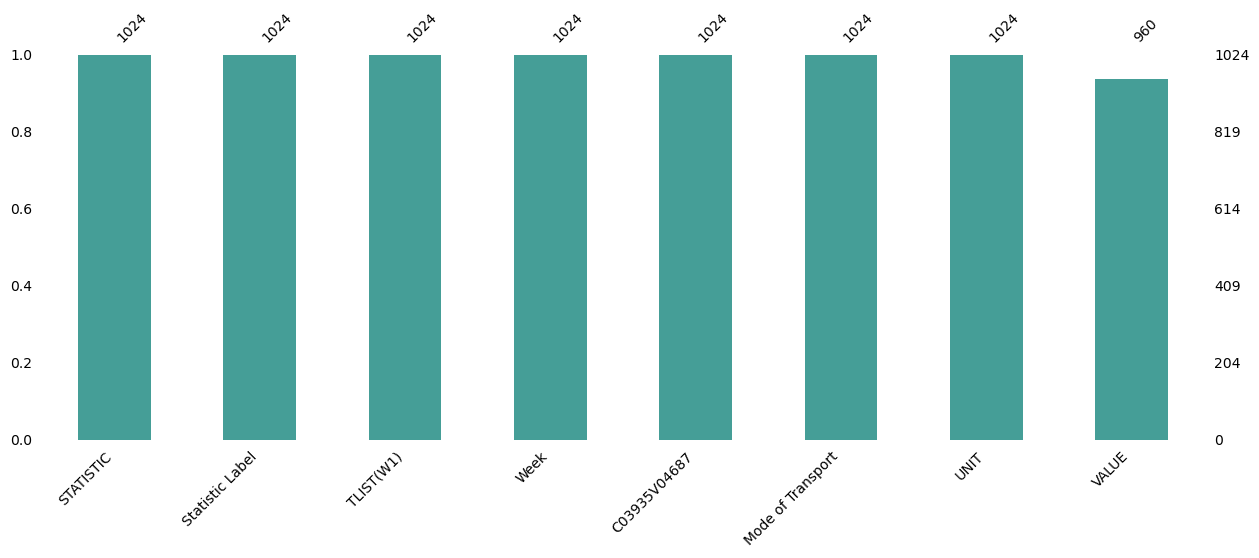

In [11]:
msno.bar(ireland,figsize=(15, 5),fontsize=10,color = '#459E97');

In [12]:
# Fill empty values with average value of column
mean_value = ireland['VALUE'].mean()
ireland['VALUE'].fillna(mean_value, inplace=True)

In [13]:
ireland.isnull().sum()

STATISTIC            0
Statistic Label      0
TLIST(W1)            0
Week                 0
C03935V04687         0
Mode of Transport    0
UNIT                 0
VALUE                0
dtype: int64

checking missing values

In [14]:
missing = ireland.isnull().sum()
missing = missing[missing > 0]
missing

Series([], dtype: int64)

to analyze the functional way

In [18]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

In [19]:
check_df(ireland)

##################### Shape #####################
(1024, 8)
##################### Types #####################
STATISTIC             object
Statistic Label       object
TLIST(W1)             object
Week                  object
C03935V04687           int64
Mode of Transport     object
UNIT                  object
VALUE                float64
dtype: object
##################### Head #####################
  STATISTIC     Statistic Label TLIST(W1)          Week  C03935V04687  \
0  THA25C01  Passenger Journeys   2019W01  2019 Week 01            10   
1  THA25C01  Passenger Journeys   2019W01  2019 Week 01            20   
2  THA25C01  Passenger Journeys   2019W01  2019 Week 01            30   
3  THA25C01  Passenger Journeys   2019W01  2019 Week 01            40   
4  THA25C01  Passenger Journeys   2019W02  2019 Week 02            10   

                      Mode of Transport    UNIT       VALUE  
0                      Dublin Metro Bus  Number 1987891.000  
1           Bus, excluding Dubli

## Data Visualization

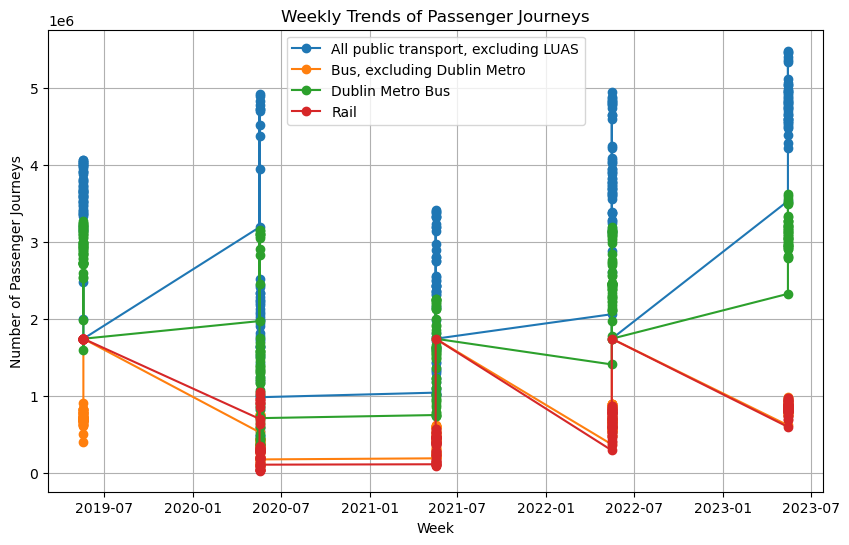

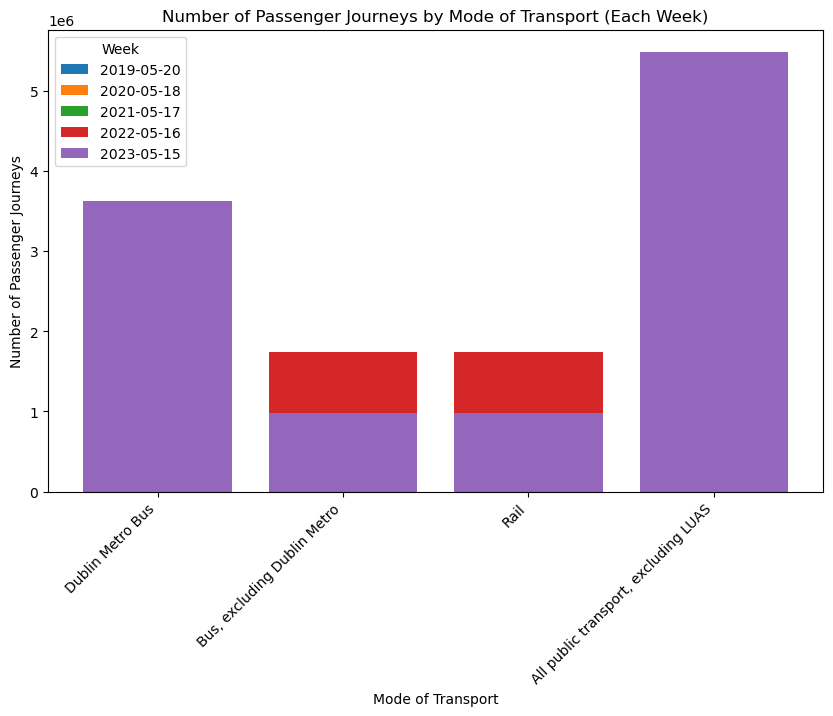

In [39]:
# Extract year and week number from the 'Week' column
ireland['Year'] = ireland['Week'].str.extract('(\d{4})')
ireland['Week_Num'] = ireland['Week'].str.extract('(\d{2})')

# Convert 'Week' column to datetime
ireland['Week'] = pd.to_datetime(ireland['Year'] + ireland['Week_Num'] + '-1', format='%Y%U-%w')

# Drop the intermediate columns used for extraction
ireland = ireland.drop(['Year', 'Week_Num'], axis=1)

# Line chart for weekly trends
plt.figure(figsize=(10, 6))
for transport_mode, group in ireland.groupby('Mode of Transport'):
    plt.plot(group['Week'], group['VALUE'], label=transport_mode, marker='o')

plt.title('Weekly Trends of Passenger Journeys')
plt.xlabel('Week')
plt.ylabel('Number of Passenger Journeys')
plt.legend()
plt.grid(True)
plt.show()

# Bar chart for each week
plt.figure(figsize=(10, 6))
for week, group in ireland.groupby('Week'):
    plt.bar(group['Mode of Transport'], group['VALUE'], label=str(week.date()))

plt.title('Number of Passenger Journeys by Mode of Transport (Each Week)')
plt.xlabel('Mode of Transport')
plt.ylabel('Number of Passenger Journeys')
plt.legend(title='Week')
plt.xticks(rotation=45, ha='right')
plt.show()

## Statistics for Data Analytics

## Machine Learning for Data Analysis

# UK

https://assets.publishing.service.gov.uk/media/65788df3254aaa000d050b7e/full_data_clean.csv/preview

In [14]:
en = pd.read_csv("full_data_clean.csv")

In [15]:
en.head()

,date,transport_type,value
0,2020-03-01,cars,1.03
1,2020-03-01,light_commercial_vehicles,1.11
2,2020-03-01,heavy_goods_vehicles,1.08
3,2020-03-01,all_motor_vehicles,1.04
4,2020-03-01,tfl_tube,1.03
